# Time Series Basics

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
path = '../data/data.csv'
df = pd.read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['Date', 'Number of Passengers']
df.head(1)

,Date,Number of Passengers
0,1949-01,112


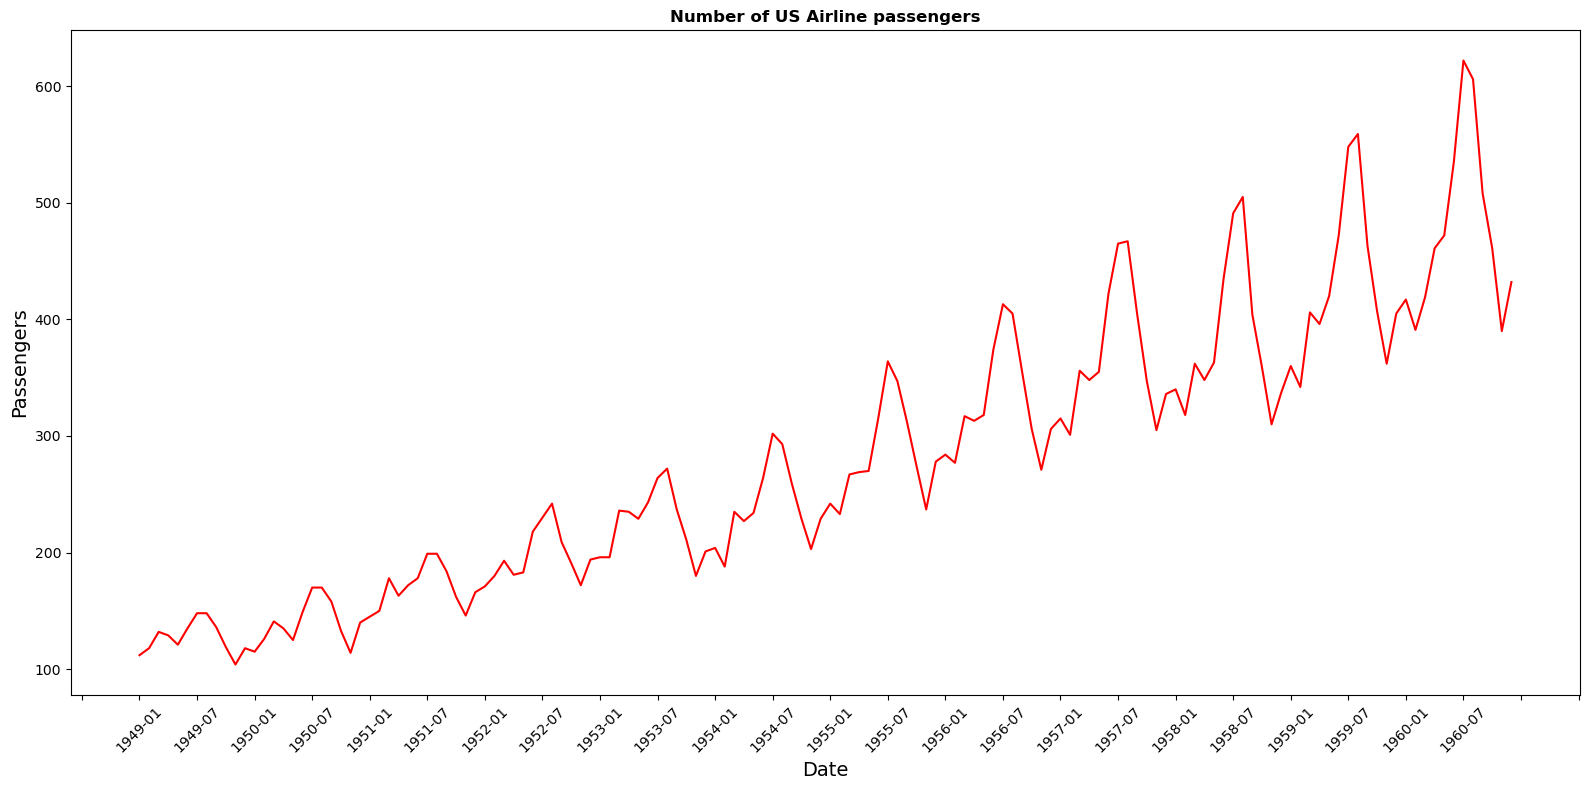

In [5]:
from matplotlib.ticker import MaxNLocator, MultipleLocator

def plot_function(df, x, y, title = "", xlabel = "Date", ylabel = "Passengers", dpi = 100):
    plt.figure(figsize = (16,8), dpi = dpi)
    plt.plot(x,y, color = "red")
    plt.title(title, fontweight = 'bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(30))
    plt.tight_layout()
    plt.show()

plot_function(df, x = df['Date'], y = df['Number of Passengers'], title = "Number of US Airline passengers")

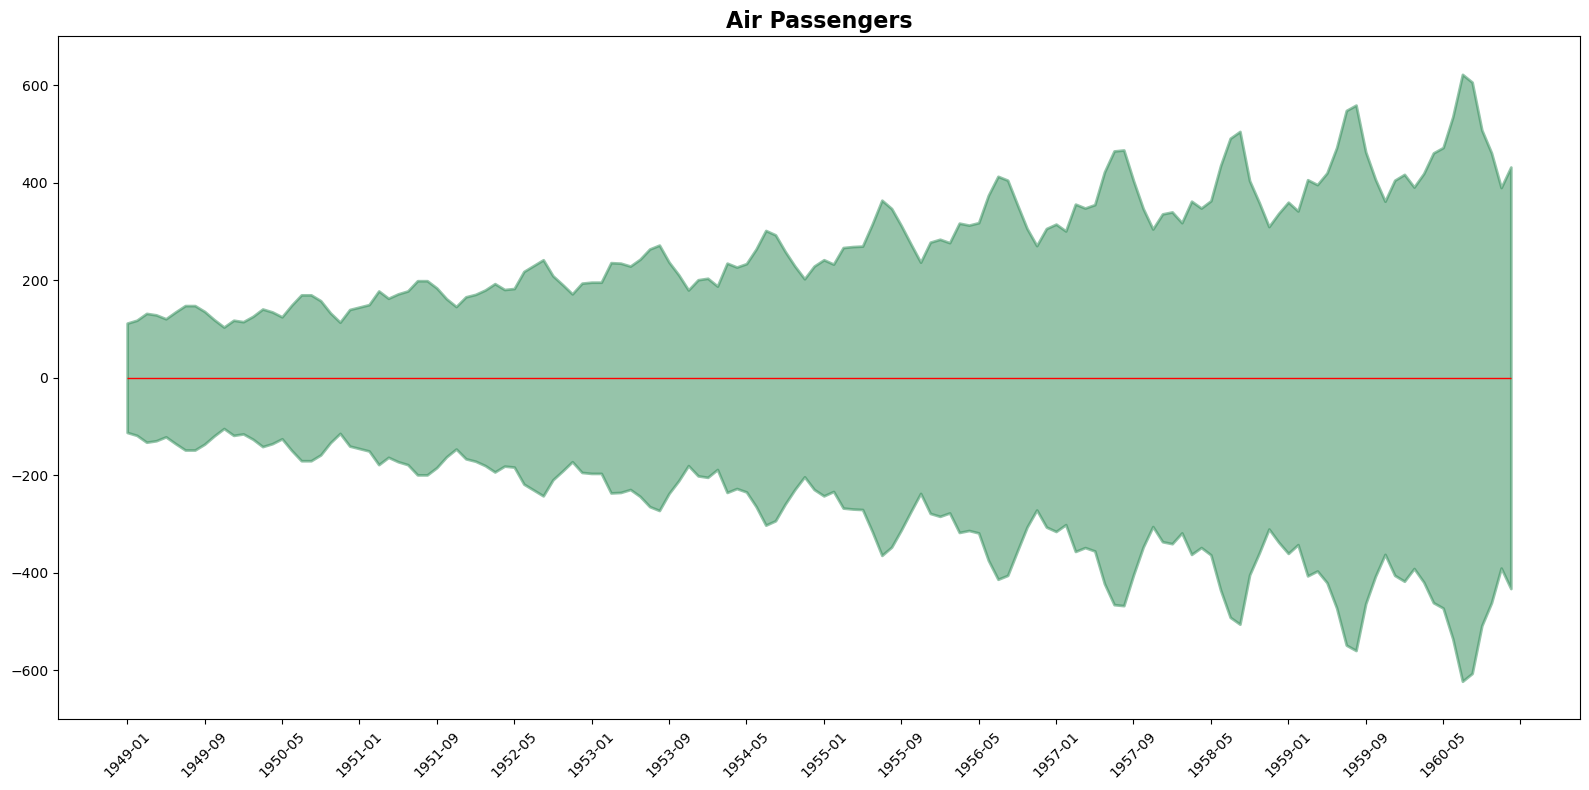

In [6]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

fig,ax = plt.subplots(1,1, figsize = (16,8), dpi = 100)
plt.fill_between(x = x, y1 = y1, y2 = - y1, alpha = 0.5, linewidth = 2, color = "seagreen")
plt.ylim(-700,700)
plt.title("Air Passengers", fontweight = 'bold', fontsize = 16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=1, color = 'red')

plt.xticks(rotation = 45, fontsize = 10)
ax.xaxis.set_major_locator(MaxNLocator(20))
plt.tight_layout()
plt.show()

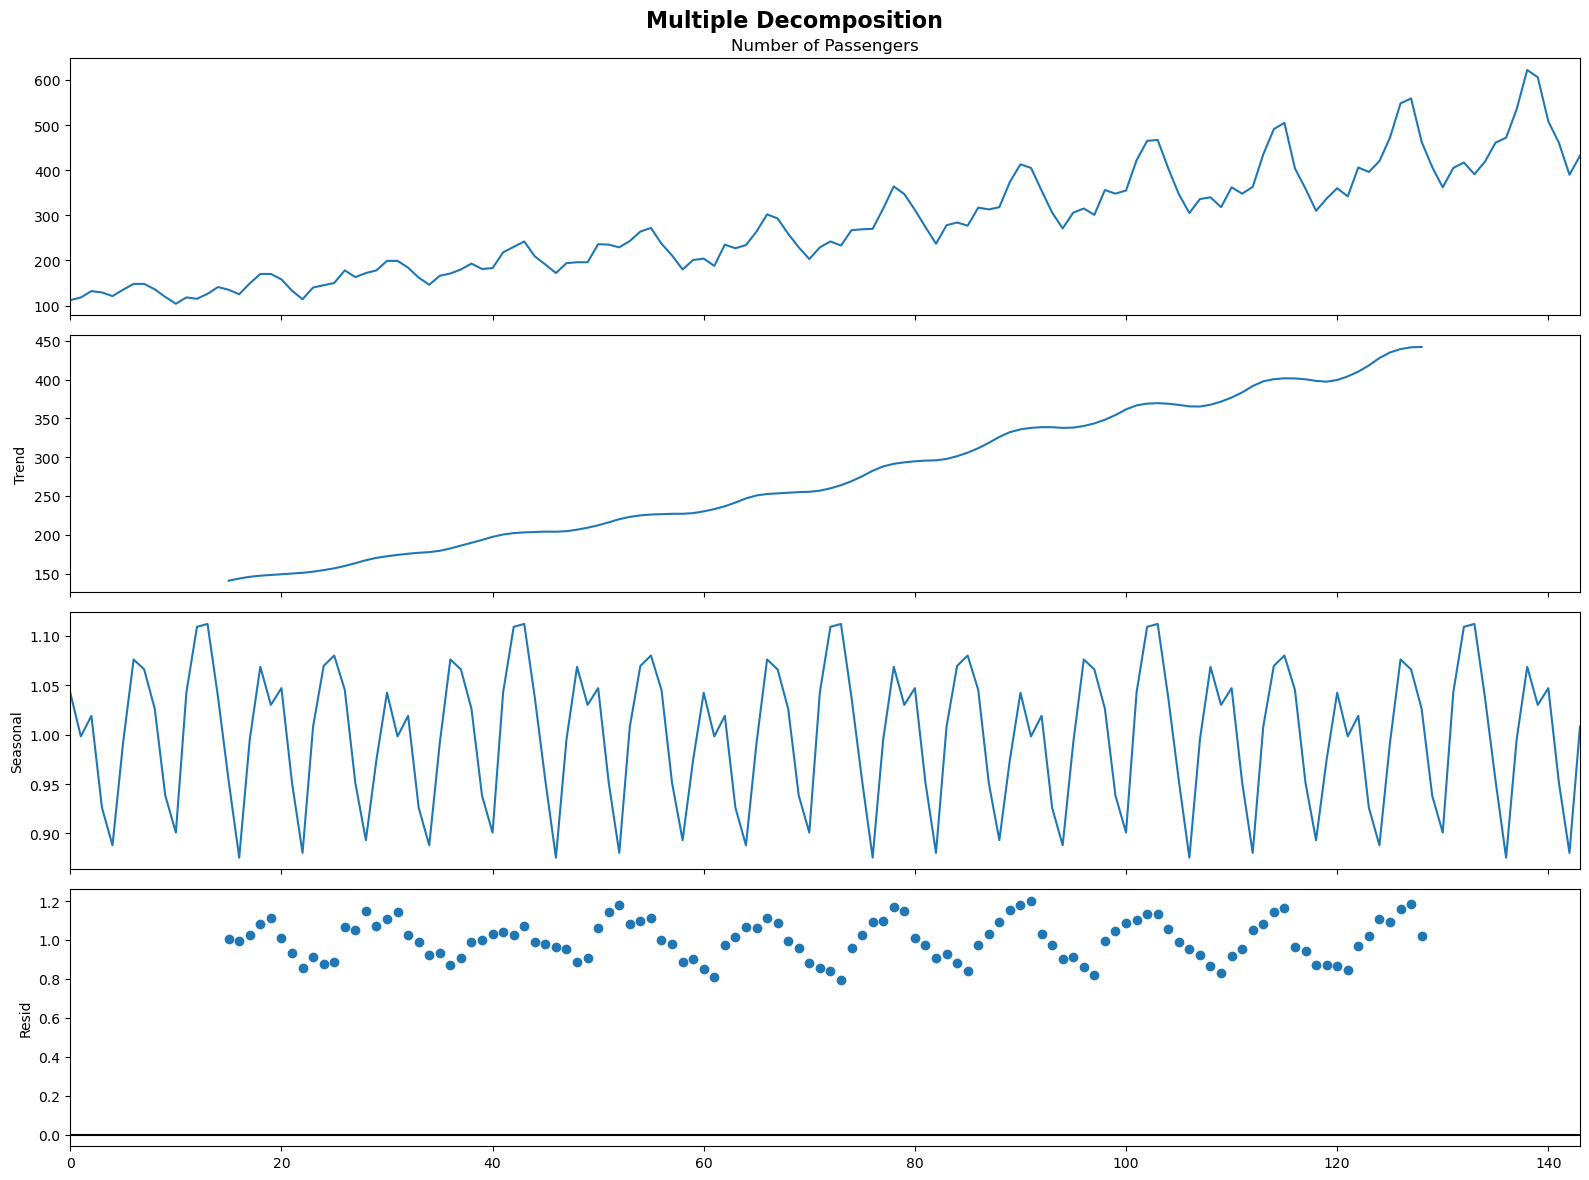

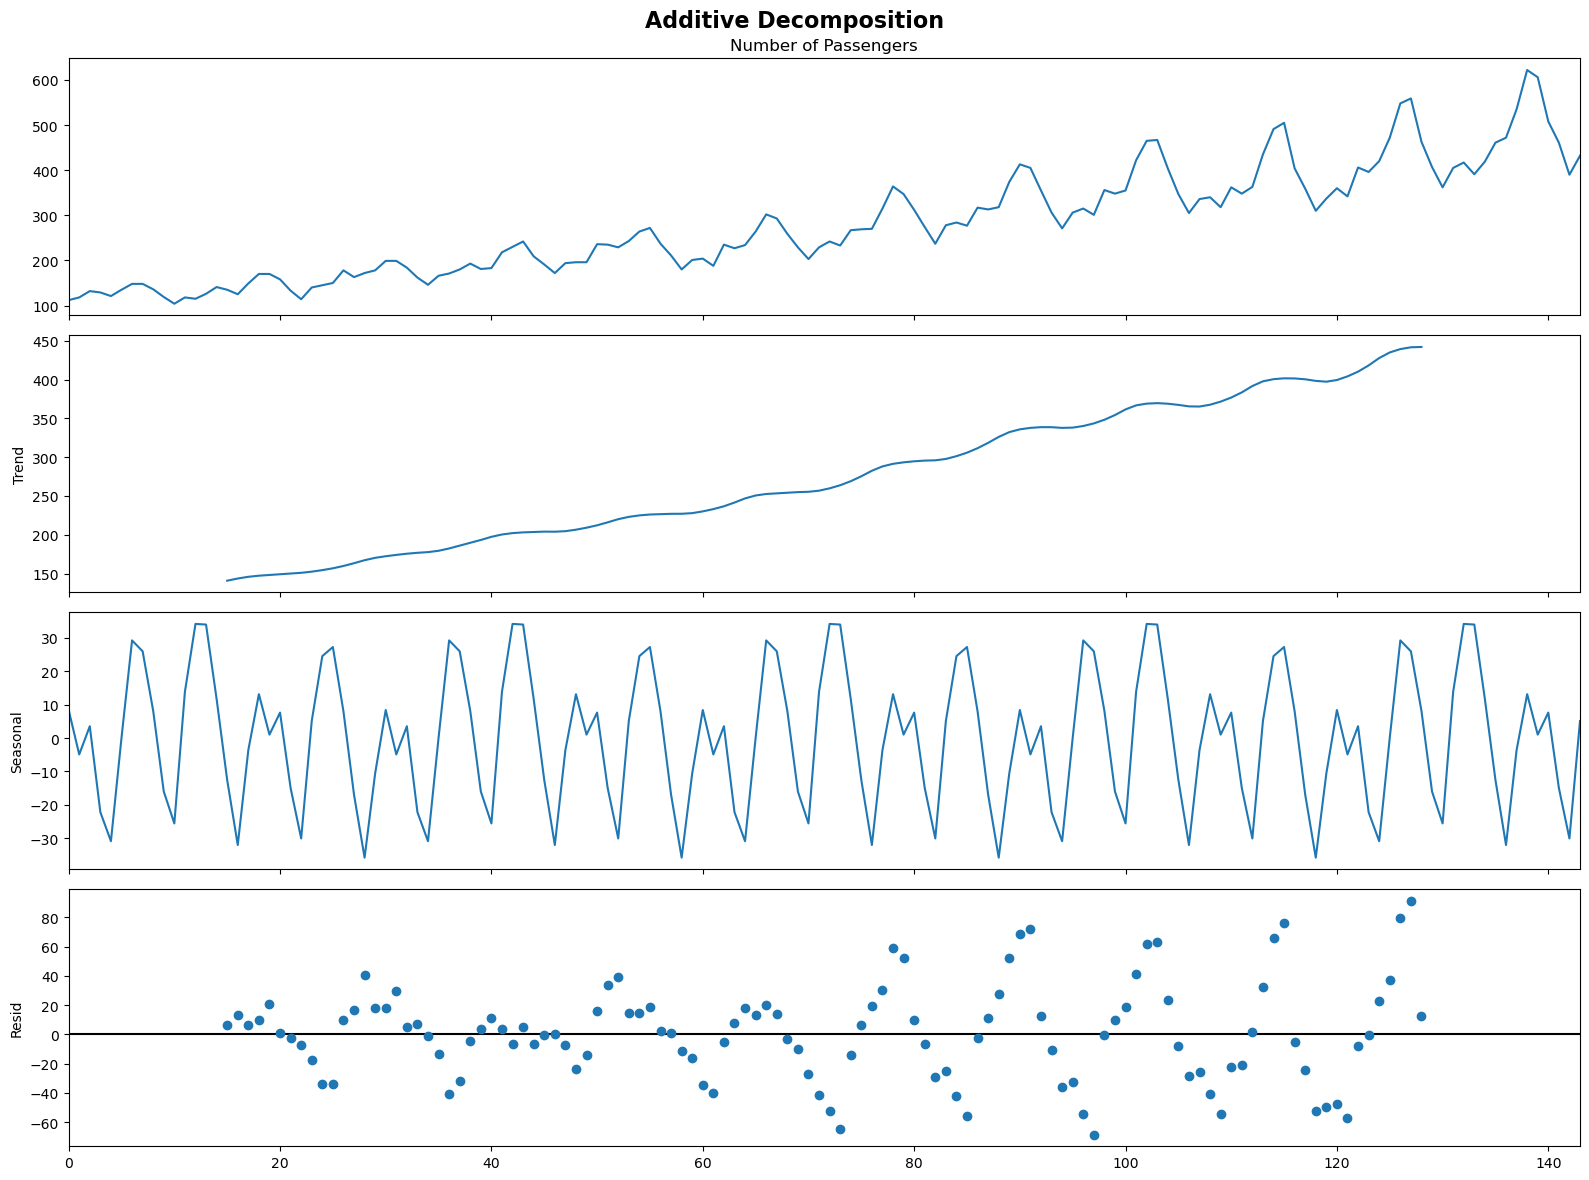

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

mult_decomp = seasonal_decompose(df["Number of Passengers"], model = 'multiplicative', period = 30)
add_decomp = seasonal_decompose(df["Number of Passengers"], model = 'additive', period = 30)

plt.rcParams.update({'figure.figsize': (16,12)})
mult_decomp.plot().suptitle('Multiple Decomposition', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
add_decomp.plot().suptitle('Additive Decomposition', fontweight = 'bold', fontsize = 16)
plt.tight_layout()

plt.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Number of Passengers,Month,Year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


In [11]:
df['Series'] = np.arange(1, len(df) +1)
df.head()

,Date,Number of Passengers,Month,Year,Series
0,1949-01-01,112,1,1949,1
1,1949-02-01,118,2,1949,2
2,1949-03-01,132,3,1949,3
3,1949-04-01,129,4,1949,4
4,1949-05-01,121,5,1949,5


In [ ]:
df.drop(['Date'], axis = 1, inplace = True)

In [16]:
data = df[['Series', 'Year', 'Month', 'Number of Passengers']]
data.head()

,Series,Year,Month,Number of Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


In [ ]:
data.rename(columns = {'Number of Passengers':'Passengers'}, inplace = True)
data.head(1)

,Series,Year,Month,Passengers
0,1,1949,1,112


In [18]:
data.shape

(144, 4)